# **Task 2:**
## **Author:** Aniruddha Jana
## **Task description:**
Stock Market Prediction And Forecasting Using Stacked LSTM

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [2]:
data = pd.read_csv("stock.csv")

#### Shape of dataset

In [3]:
data.shape

(2035, 8)

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,28-09-2018,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,27-09-2018,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,26-09-2018,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,25-09-2018,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,24-09-2018,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
data.dtypes

Date                    datetime64[ns]
Open                           float64
High                           float64
Low                            float64
Last                           float64
Close                          float64
Total Trade Quantity             int64
Turnover (Lacs)                float64
dtype: object

In [9]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
data = data.sort_values('Date')

In [11]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2004,2010-01-09,121.65,123.65,120.2,122.7,123.00,2274887,2781.63
1983,2010-01-10,121.30,124.00,121.3,123.6,123.50,711861,875.04
1962,2010-01-11,126.00,128.40,123.0,124.5,124.55,1621553,2044.44
1941,2010-01-12,113.50,116.00,113.0,114.5,114.75,628391,722.87
2026,2010-02-08,117.30,118.50,116.6,118.1,117.30,663593,779.85


In [12]:
data.reset_index(inplace=True)

## Data Visualisation

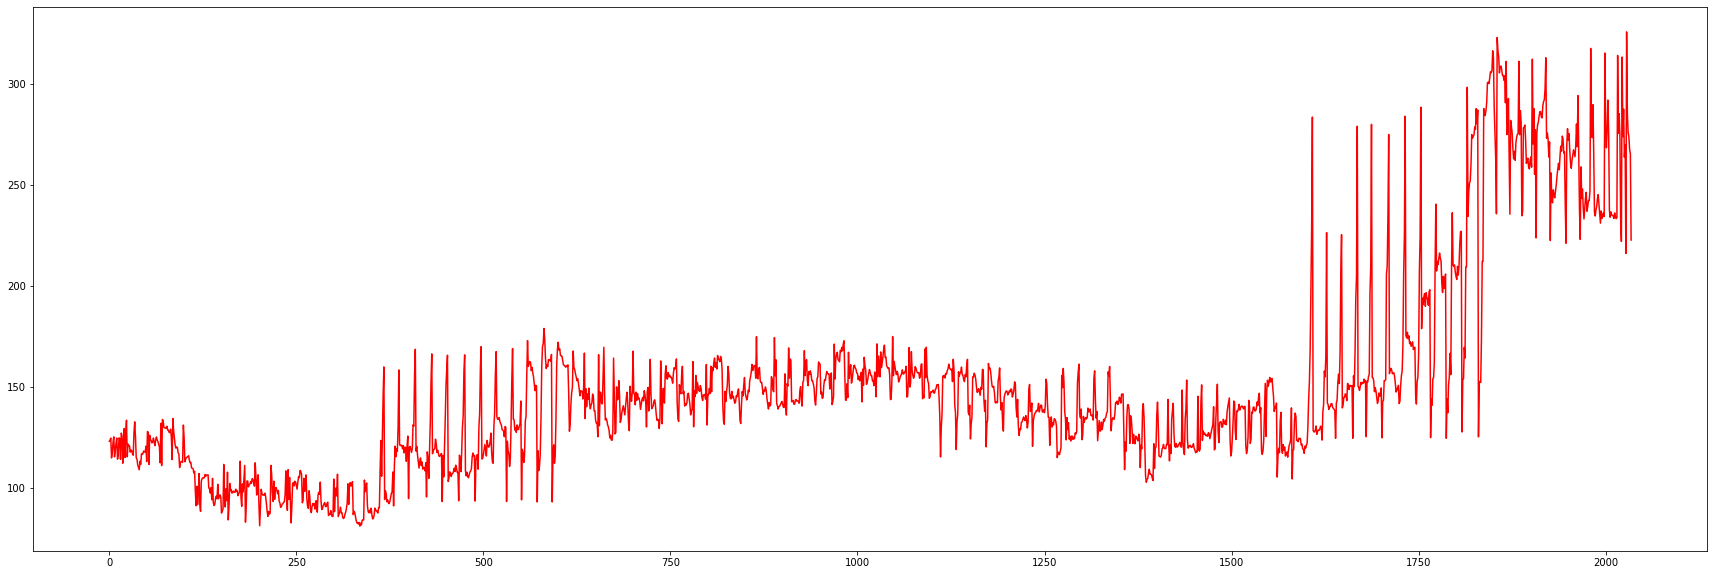

In [13]:
plt.figure(figsize=(30,10))
plt.plot(data['Close'], 'r')
plt.show()

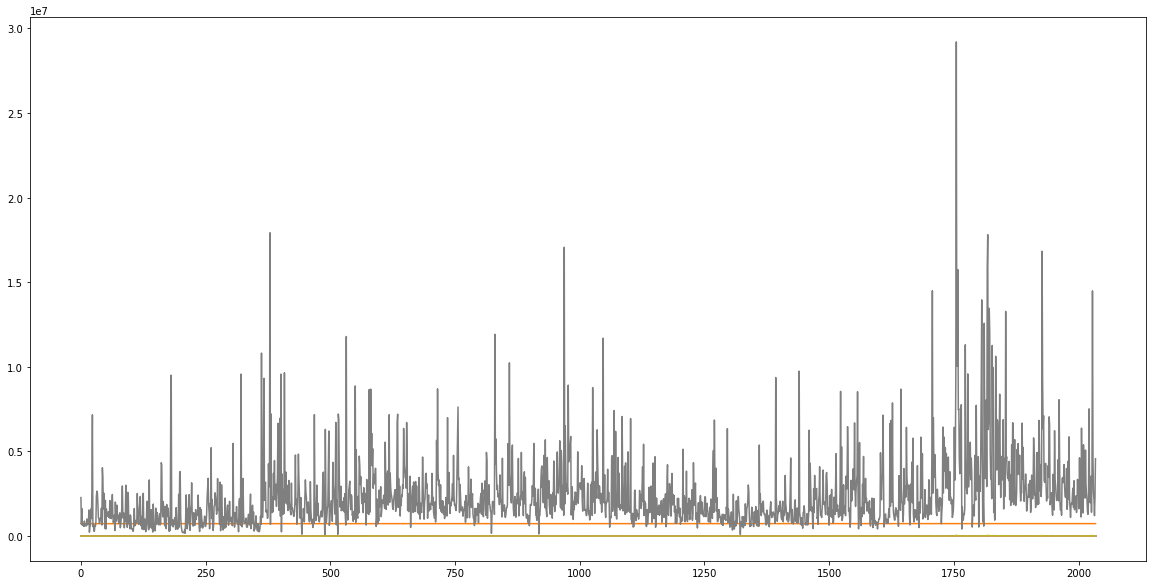

In [14]:
plt.figure(figsize=(20,10))
plt.plot(data)
plt.show()

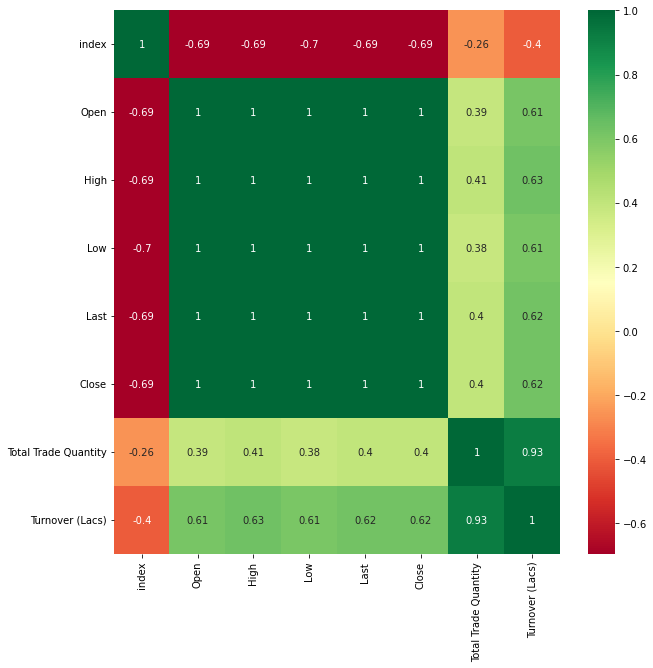

In [15]:
dcorr = data.corr()
top_corr_features = dcorr.index
plt.figure(figsize=(10,10))
#plot heatmap
sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

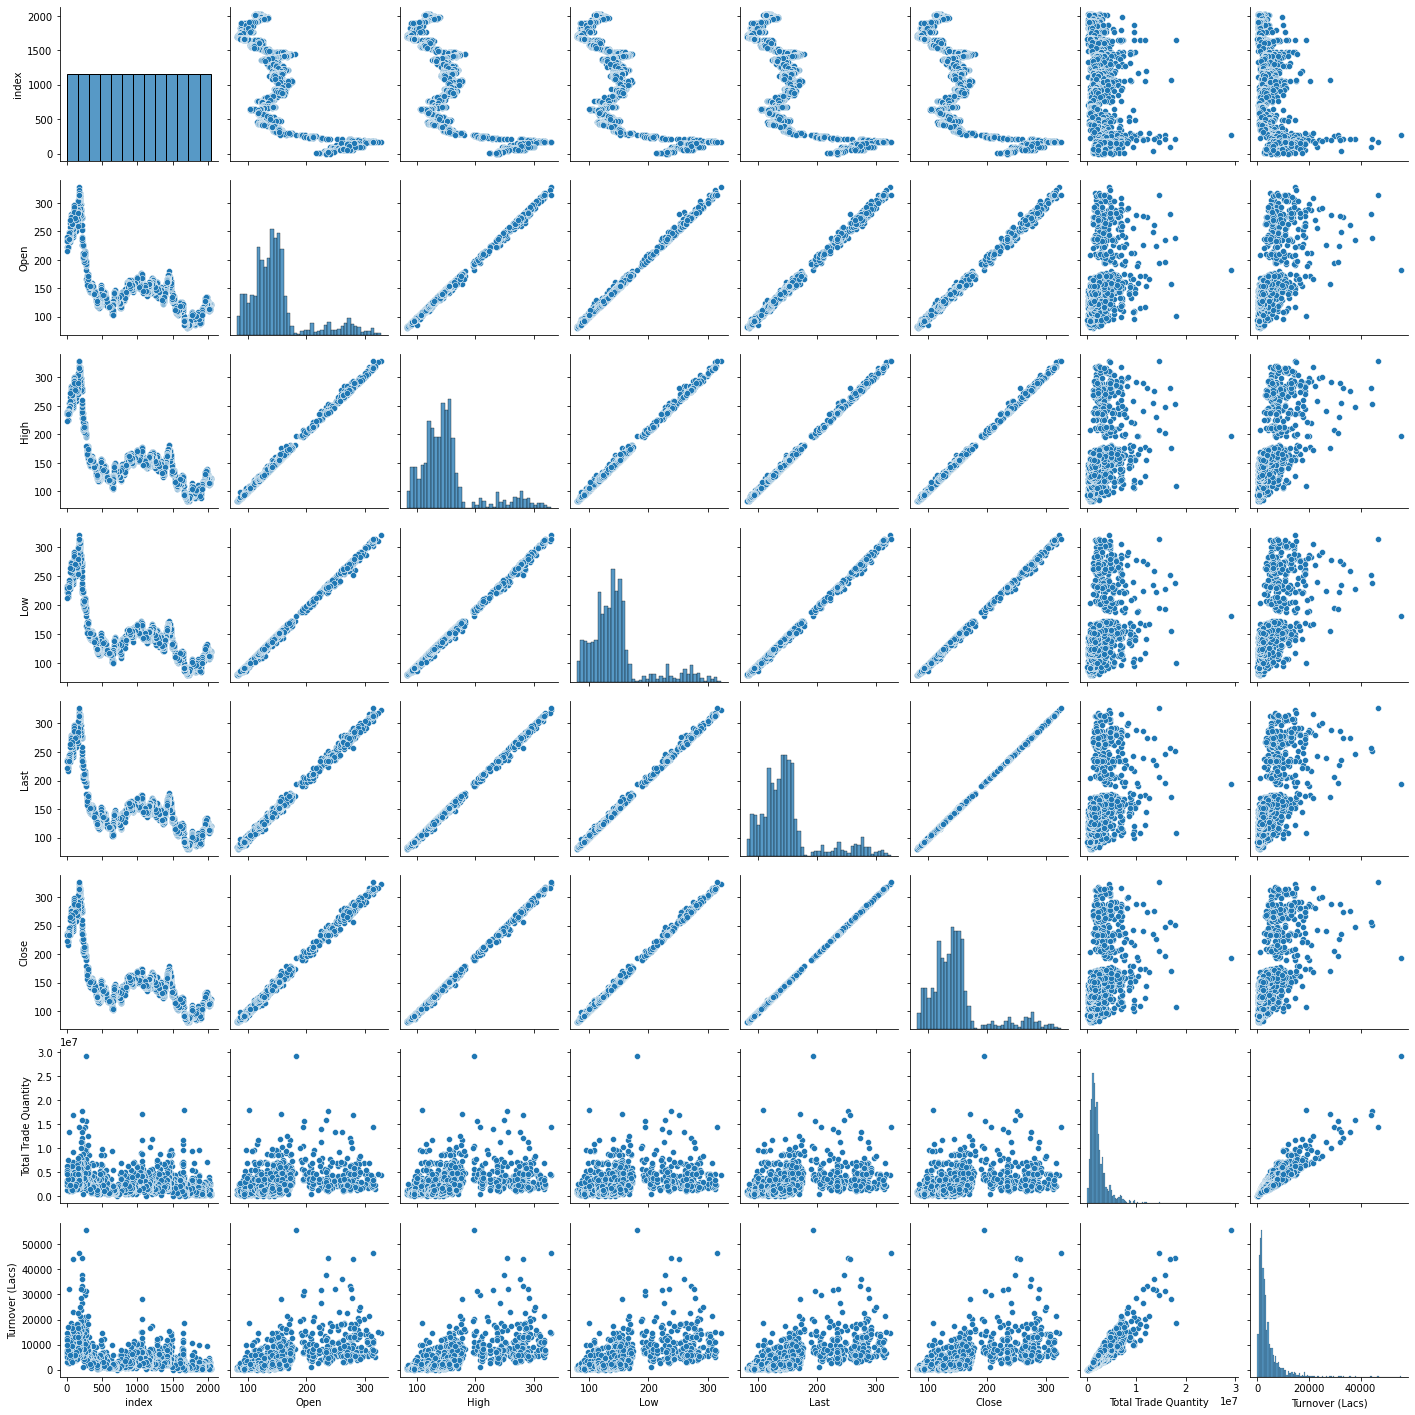

In [16]:
sns.pairplot(data)
plt.show()

## MinMax Scalar

In [17]:
sc = MinMaxScaler()
data_close = sc.fit_transform(np.array(data['Close']).reshape(-1,1))

## Splitting Train, Test data

In [18]:
train_size = int(len(data_close)*0.70)
test_size = len(data_close) - train_size
train, test = data_close[0 : train_size, :], data_close[train_size : len(data_close), :1]

In [19]:
def create_matrix(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [20]:
step=100 # time step
X_train, y_train = create_matrix(train, step)
X_test, y_test = create_matrix(test, step)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## LSTM Model

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=77, batch_size=64, verbose=1, shuffle=True).history

Epoch 1/77
19/19 [==============================] - 10s 266ms/step - loss: 0.0083 - val_loss: 0.0037
Epoch 2/77
19/19 [==============================] - 4s 188ms/step - loss: 0.0033 - val_loss: 0.0026
Epoch 3/77
19/19 [==============================] - 4s 184ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/77
19/19 [==============================] - 4s 186ms/step - loss: 0.0026 - val_loss: 0.0022
Epoch 5/77
19/19 [==============================] - 3s 183ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 6/77
19/19 [==============================] - 4s 185ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 7/77
19/19 [==============================] - 3s 183ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 8/77
19/19 [==============================] - 3s 184ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 9/77
19/19 [==============================] - 3s 184ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 10/77
19/19 [==============================] - 4s 186ms/step - loss: 0.0025 - val_loss: 0.002

## PLotting

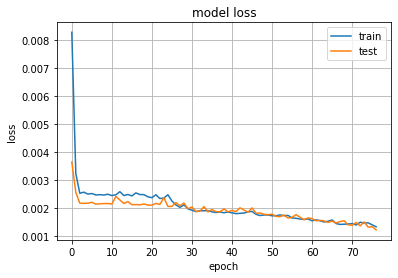

In [25]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)
plt.show()

## Predictions

In [26]:
preds = model.predict(X_test)
corrected_preds = sc.inverse_transform(preds)

## Visualising Predictions

In [27]:
corrected_y_test = sc.inverse_transform(y_test.reshape(-1 , 1))

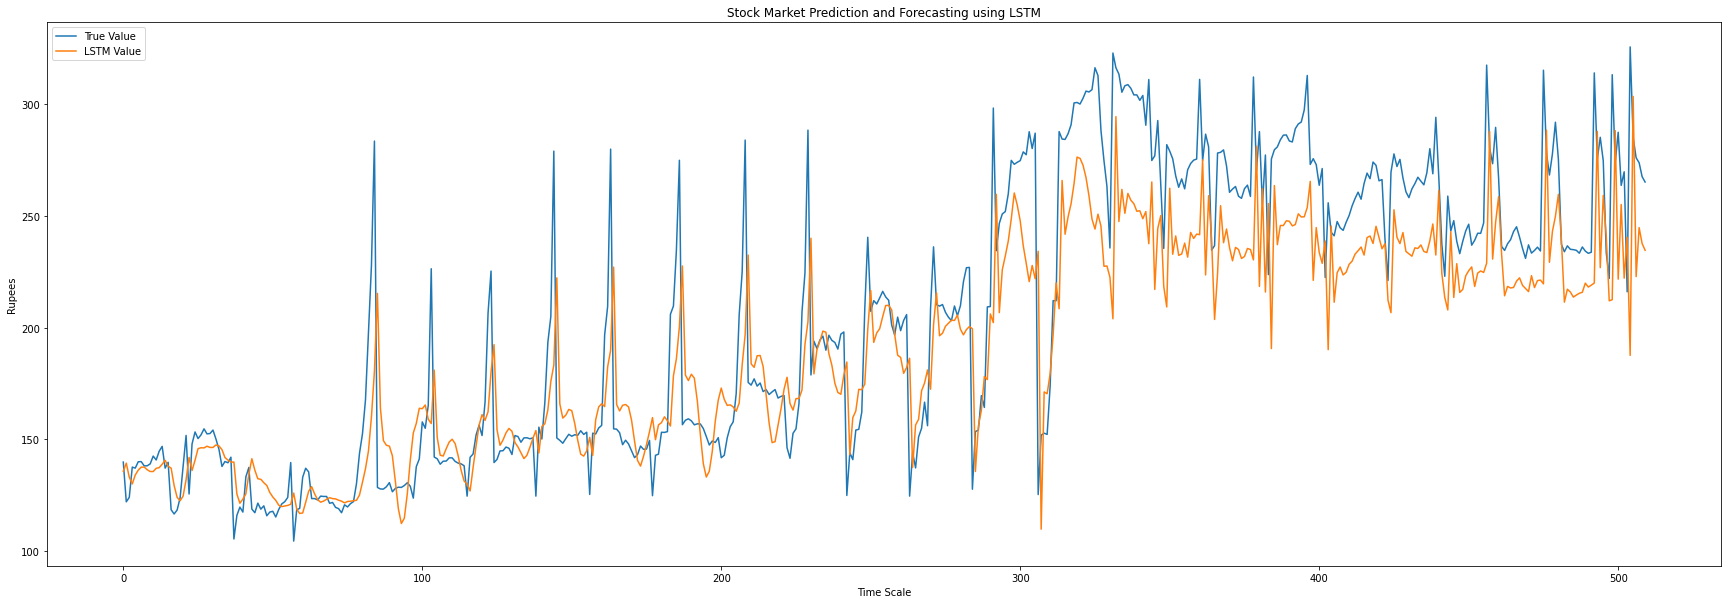

In [28]:
plt.figure(figsize=(30,10))
plt.plot(corrected_y_test, label="True Value")
plt.plot(corrected_preds, label="LSTM Value")
plt.title("Stock Market Prediction and Forecasting using LSTM")
plt.xlabel("Time Scale")
plt.ylabel("Rupees")
plt.legend()
plt.show()